In [1]:
import tensorflow.keras as keras
from tensorflow.keras import initializers,regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import math

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib

In [3]:
iron = pd.read_csv('Iron.csv')
proton = pd.read_csv('Proton.csv')
proton['mass'] = [1 for i in range(len(proton))]
helium = pd.read_csv('Helium.csv')
helium['mass'] = [2 for i in range(len(helium))]
oxygen = pd.read_csv('Oxygen.csv')
oxygen['mass'] = [3 for i in range(len(oxygen))]

In [4]:
df = iron.append(proton)
df = df.append(helium)
df = df.append(oxygen)

In [5]:
df['log_energy'] = np.log10(df['energy'])
df['cos_zenith'] = np.cos(df['zenith'])
df['log_energy_loss'] = np.log10(df['energy_loss'])

/home/andy/.local/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df = df.loc[(df['Xmax']<900)&(df['Xmax']>400)&(df['chi2']<3)&(df['S125']>0)]

In [7]:
check = [math.isnan(i)==0 for i in df['energy_loss'].values]

In [8]:
df_coinc = df[check]
check2 = [i==0 for i in np.isnan(df_coinc['log_energy_loss'].values)]
df_coinc = df_coinc.loc[check2]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df_coinc[['log_energy_loss']].values
X = df_coinc[['cos_zenith','S125','alpha','beta','chi','omega']].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
regressor = BaggingRegressor(DecisionTreeRegressor(),n_estimators=100)

In [14]:
regressor.fit(X_train,y_train)

/home/andy/.local/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [15]:
predictions = regressor.predict(X_test)

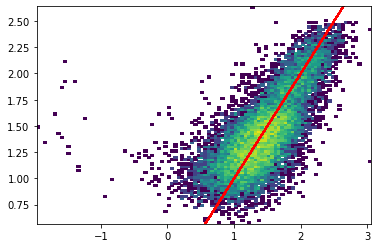

In [16]:
plt.hist2d(np.hstack(y_test),predictions,bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(y_test,y_test,color='r')
plt.show()

In [17]:
df['log_energy_loss_prediction'] = regressor.predict(df[['cos_zenith','S125','alpha','beta','chi','omega']].values)

In [18]:
df.head()

,Unnamed: 0,mass,energy,zenith,S125,energy_loss,he_stoch,he_stoch2,alpha,beta,chi,chi2,omega,Xmax,log_energy,cos_zenith,log_energy_loss,log_energy_loss_prediction
0,0,4,10728140.0,0.898194,0.276340,NaN,NaN,NaN,0.383703,4.433823,0.000993,0.344318,-4.549848e-07,511.545624,7.030524,0.623024,NaN,1.630861
1,1,4,10728140.0,0.875574,0.252234,NaN,NaN,NaN,0.575905,4.373029,0.000368,0.391465,-4.452286e-06,511.545624,7.030524,0.640557,NaN,1.705583
2,2,4,10728140.0,0.883769,0.332662,NaN,NaN,NaN,0.530668,4.290579,-0.000152,0.332593,2.043415e-07,511.545624,7.030524,0.634242,NaN,1.572232
3,3,4,10728140.0,0.885476,0.341780,NaN,NaN,NaN,0.557937,4.291585,-0.000100,0.481211,-5.748144e-07,511.545624,7.030524,0.632921,NaN,1.643350
4,4,4,10728140.0,0.874735,0.230328,NaN,NaN,NaN,0.714769,4.424826,-0.002416,0.319403,5.148087e-06,511.545624,7.030524,0.641201,NaN,1.684653


In [19]:
y = df['mass'].values
X = df[['log_energy_loss_prediction','cos_zenith','S125','alpha','beta','chi','omega']].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
regressor = BaggingRegressor(DecisionTreeRegressor(),n_estimators=100)

In [22]:
regressor.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [23]:
predictions2 = regressor.predict(X_test)

In [24]:
mass = y_test

In [25]:
iron_prediction = predictions2[mass==4]
proton_prediction = predictions2[mass==1]
helium_prediction = predictions2[mass==2]
oxygen_prediction = predictions2[mass==3]

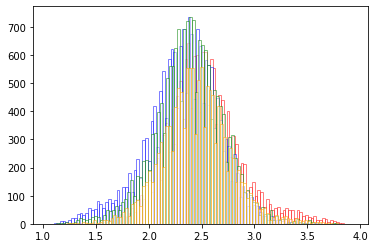

In [26]:
plt.hist(iron_prediction,bins=100,facecolor='w',edgecolor='r',alpha=0.5)
plt.hist(proton_prediction,bins=100,facecolor='w',edgecolor='b',alpha=0.5)
plt.hist(helium_prediction,bins=100,facecolor='w',edgecolor='g',alpha=0.5)
plt.hist(oxygen_prediction,bins=100,facecolor='w',edgecolor='orange',alpha=0.5)
plt.show()